# Training Results

In [597]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

losses = pd.read_json("training_info/losses.json")
info_per_episode = pd.read_json("training_info/episodes_summary.json")
training_parameters = pd.read_json("training_info/training_parameters.json", typ="series").to_dict() 

training_parameters

{'map_size': 10.0,
 'fov_distance': 2.0,
 'max_number_of_steps': 100.0,
 'max_step_height': 1.0,
 'max_drop_height': 1.0,
 'learning_rate': 5e-05,
 'batch_size': 512.0,
 'minibatch_size': 256.0,
 'epochs': 3.0,
 'clip_ratio': 0.2,
 'c1': 0.5,
 'c2': 0.01}

## Utilities

In [598]:
def compare_rl_path_to_optimal_path(agent_positions, optimal_path_no_slope, optimal_path_w_slope):
    agent_lengths = [len(p) for p in agent_positions if p]
    no_slope_lengths = [len(p) for p in optimal_path_no_slope if p]
    w_slope_lengths = [len(p) for p in optimal_path_w_slope if p]

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True, sharex=True)

    all_lengths = agent_lengths + no_slope_lengths + w_slope_lengths
    min_val = min(all_lengths)
    max_val = max(all_lengths)
    bins = np.linspace(min_val, max_val, 21)

    ax1.hist(agent_lengths, bins=bins, alpha=0.7, color='blue', label='Agent Paths')
    ax1.hist(no_slope_lengths, bins=bins, alpha=0.7, color='red', label='Optimal (No Slope)')

    avg_agent = np.mean(agent_lengths)
    avg_no_slope = np.mean(no_slope_lengths)

    ax1.axvline(avg_agent, color='blue', linestyle='--', label=f'Agent Avg: {avg_agent:.2f}')
    ax1.axvline(avg_no_slope, color='red', linestyle='--', label=f'No Slope Avg: {avg_no_slope:.2f}')
    ax1.set_title('Agent vs. Optimal (No Slope)')
    ax1.set_xlabel('Path Length (Number of Steps)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.5)

    ax2.hist(agent_lengths, bins=bins, alpha=0.7, color='blue', label='Agent Paths')
    ax2.hist(w_slope_lengths, bins=bins, alpha=0.7, color='green', label='Optimal (w/ Slope)')

    avg_w_slope = np.mean(w_slope_lengths)

    ax2.axvline(avg_agent, color='blue', linestyle='--', label=f'Agent Avg: {avg_agent:.2f}')
    ax2.axvline(avg_w_slope, color='green', linestyle='--', label=f'W/ Slope Avg: {avg_w_slope:.2f}')
    ax2.set_title('Agent vs. Optimal (w/ Slope)')
    ax2.set_xlabel('Path Length (Number of Steps)')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.5)

    plt.suptitle('Distribution of Path Lengths', fontsize=16)
    plt.tight_layout()
    plt.show()

def compare_episode_lengths(first_episodes_length, last_episodes_length):
    n_episodes = len(first_episodes_length)
    max_steps = training_parameters["max_number_of_steps"]

    first_episodes_avg_length = sum(first_episodes_length) / n_episodes
    first_episodes_std_dev = np.std(first_episodes_length)
    
    last_episodes_avg_length = sum(last_episodes_length) / n_episodes
    last_episodes_std_dev = np.std(last_episodes_length)

    print(f"First {n_episodes} episodes avg duration was {first_episodes_avg_length:.2f}/{max_steps} with std deviation of {first_episodes_std_dev}")
    print(f"Last {n_episodes} episodes avg duration was {last_episodes_avg_length:.2f}/{max_steps} with std deviation of {last_episodes_std_dev}")

def compare_completition_ratio(first_episodes_terminates, last_episodes_terminates):
    n_episodes = len(first_episodes_terminates)

    first_episodes_successful_perc = (sum(first_episodes_terminates) / n_episodes) * 100
    last_episodes_successful_perc = (sum(last_episodes_terminates) / n_episodes) * 100

    print(f"First {n_episodes} episodes succesfully terminated {first_episodes_successful_perc:.2f}% of times")
    print(f"Last {n_episodes} episodes succesfully terminated {last_episodes_successful_perc:.2f}% of times")

def print_invalid_paths_occurrence(optimal_paths):
    n_episodes = len(optimal_paths)
    # Conta quante entries sono liste vuote
    invalid_paths = sum(optimal_paths.apply(lambda x: isinstance(x, list) and len(x) == 0))
    invalid_paths_perc = (invalid_paths / n_episodes) * 100
    print(f"Optimal path algorithm failed to find a path in {invalid_paths} out of {n_episodes} episodes ({invalid_paths_perc:.2f}%)")


## Loss Throughout Training


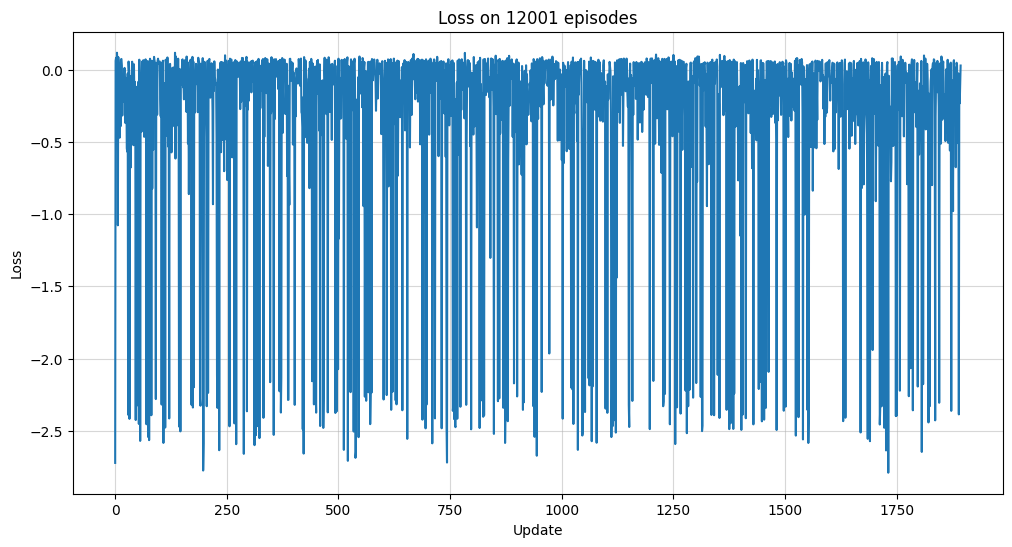

In [599]:
plt.figure(figsize=(12,6))
plt.title(f"Loss on {len(info_per_episode)} episodes")
plt.plot(losses, label="loss")
plt.grid(True, alpha=0.5)
plt.xlabel("Update")
plt.ylabel("Loss")

plt.show()

## Training Info

For each episode (row), this dataset includes:
- agent_positions: list of the agent’s positions for each episode
- rewards: list of rewards for each episode
- terminated: list of termination flags for each episode
- truncated: list of truncation flags for each episode
- optimal_path_no_slope: list of optimal paths (ignoring slope) for each episode
- optimal_path_w_slope: list of optimal paths (considering slope) for each episode
- episode_lengths: list of episode lengths


In [600]:
info_per_episode.head()

,agent_positions,rewards,terminated,truncated,optimal_path_no_slope,optimal_path_w_slope,episode_length
0,"[[0, 7], [0, 8], [0, 8], [0, 7], [0, 7], [0, 7...","[-0.05, -0.05, -0.05, 0.0, -0.05, -0.05, 0.0, ...",False,True,"[[0, 7], [1, 6], [2, 5], [3, 4], [4, 3], [5, 3...","[[0, 7], [1, 6], [2, 5], [3, 4], [4, 3], [5, 3...",100
1,"[[5, 8], [5, 8], [5, 8], [5, 8], [5, 7], [4, 8...","[-0.05, -0.05, -0.05, -0.05, 0.0, -0.05, -0.05...",False,True,"[[4, 8], [3, 7], [2, 7], [1, 7], [0, 7], [1, 6...","[[4, 8], [3, 7], [2, 7], [1, 7], [0, 7], [1, 6...",100
2,"[[2, 0], [2, 0], [2, 0], [2, 0], [1, 0], [1, 0...","[-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0....",False,True,"[[2, 0], [1, 0], [0, 1], [0, 2], [1, 3], [1, 4...","[[2, 0], [1, 0], [0, 1], [1, 1], [1, 2], [2, 3...",100
3,"[[7, 7], [8, 7], [8, 7], [7, 7], [8, 7], [8, 6...","[-0.05, -0.05, -0.05, 0.0, -0.05, 0.0, -0.05, ...",False,True,"[[7, 7], [6, 7], [5, 8], [5, 7], [5, 6], [5, 5...","[[7, 7], [7, 6], [7, 5], [7, 4], [7, 3], [7, 2...",100
4,"[[7, 4], [7, 5], [8, 6], [8, 6], [8, 6], [9, 5...","[0.0, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05...",False,True,"[[8, 4], [7, 3], [6, 3], [5, 3]]","[[8, 4], [7, 4], [6, 4], [5, 3]]",100


In [601]:
print_invalid_paths_occurrence(info_per_episode["optimal_path_no_slope"])

Optimal path algorithm failed to find a path in 311 out of 12001 episodes (2.59%)


### Performance Comparison - First X% of training vs. last X% of training

In [602]:
x = 0.01      # this is the percentage of episodes to consider at the beginning and end of training

n_rows_to_consider = int(len(info_per_episode) * x)
print(f"The first {n_rows_to_consider} episodes will be compared to the last {n_rows_to_consider} episodes")

first_episodes = info_per_episode.iloc[:n_rows_to_consider, :]
last_episodes = info_per_episode.iloc[-n_rows_to_consider:, :]


The first 120 episodes will be compared to the last 120 episodes


In [603]:
compare_episode_lengths(first_episodes["episode_length"], last_episodes["episode_length"])


First 120 episodes avg duration was 79.00/100.0 with std deviation of 33.210941971986685
Last 120 episodes avg duration was 77.19/100.0 with std deviation of 34.72158210521071


In [604]:
compare_completition_ratio(first_episodes["terminated"], last_episodes["terminated"])

First 120 episodes succesfully terminated 34.17% of times
Last 120 episodes succesfully terminated 36.67% of times


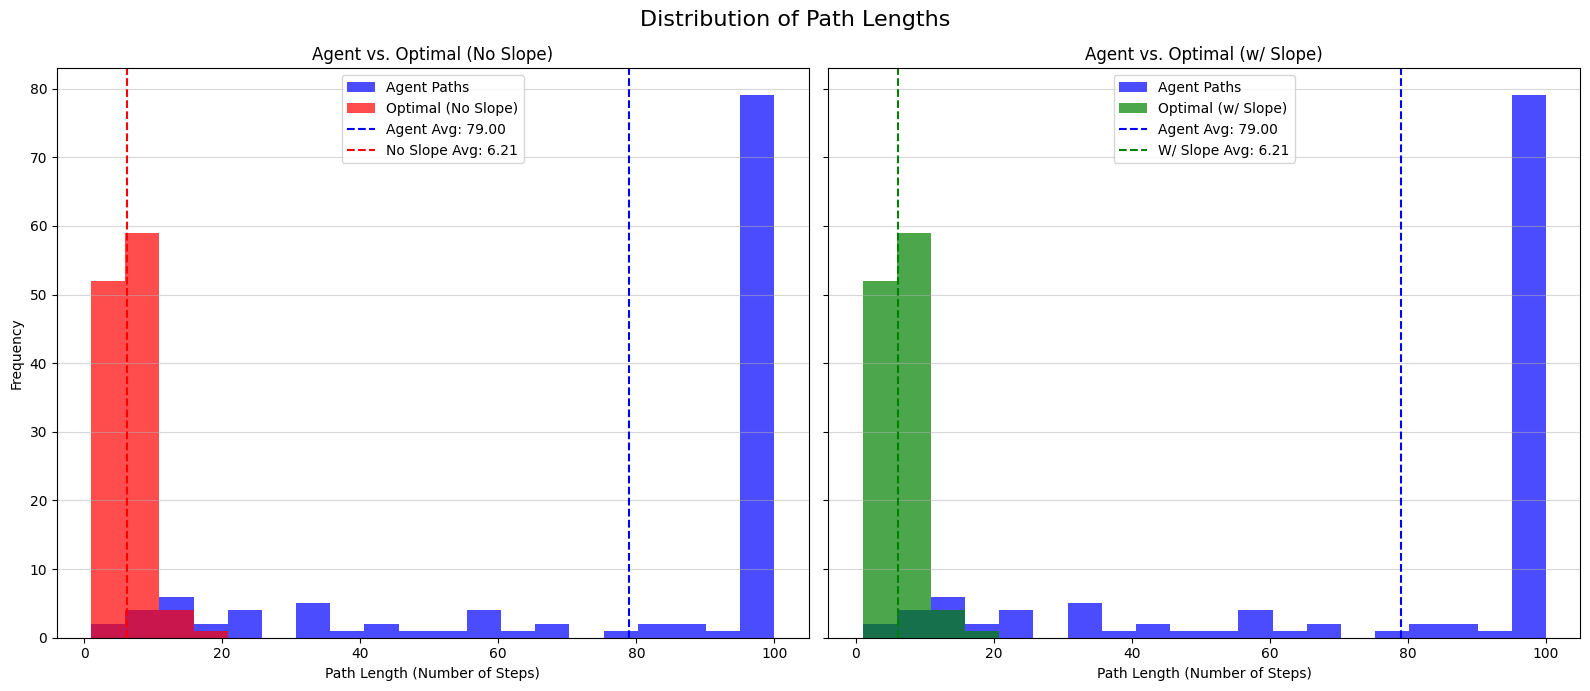

In [605]:
compare_rl_path_to_optimal_path(first_episodes["agent_positions"], first_episodes["optimal_path_no_slope"], first_episodes["optimal_path_w_slope"])


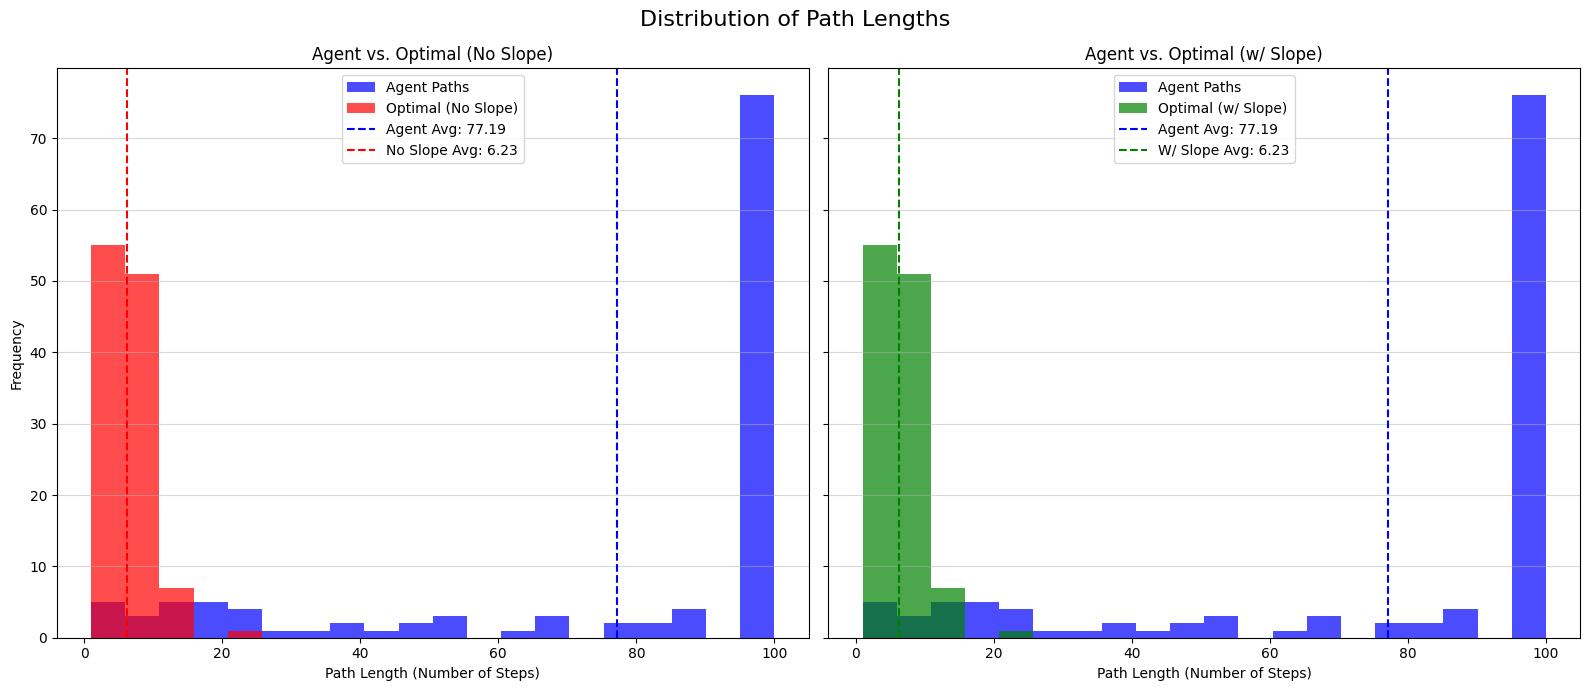

In [606]:
compare_rl_path_to_optimal_path(last_episodes["agent_positions"], last_episodes["optimal_path_no_slope"], last_episodes["optimal_path_w_slope"])
